In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


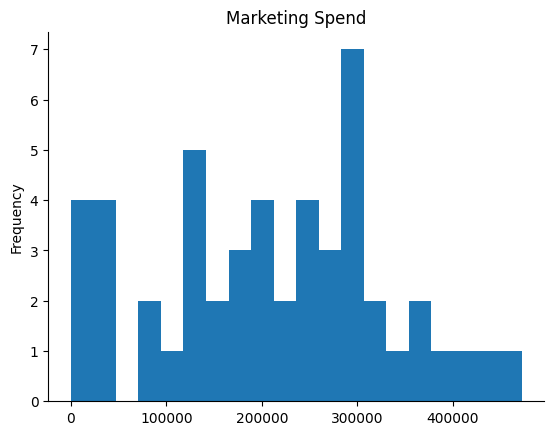

In [ ]:
# @title Marketing Spend

from matplotlib import pyplot as plt
df['Marketing Spend'].plot(kind='hist', bins=20, title='Marketing Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
#Here, we can see Profit ranges from 14681 to 192261 and a median of 107978.

<ipython-input-21-dcf60d528c0f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


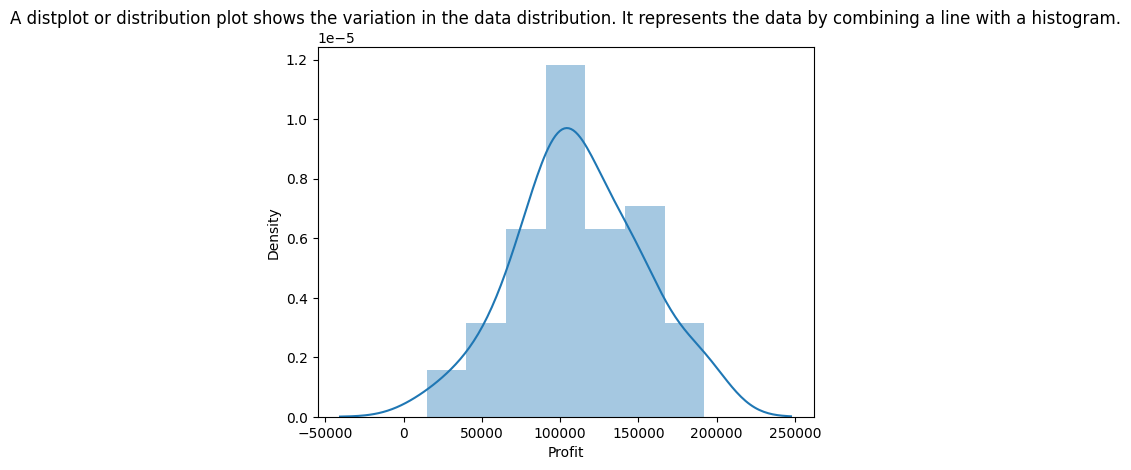

In [ ]:
# Data distribution
plt.title('profit distribution plot')
sns.distplot(df['Profit'])
plt.show()


In [ ]:
#plt.title('A distplot or distribution plot shows the variation in the data distribution. It represents the data by combining a line with a histogram.')

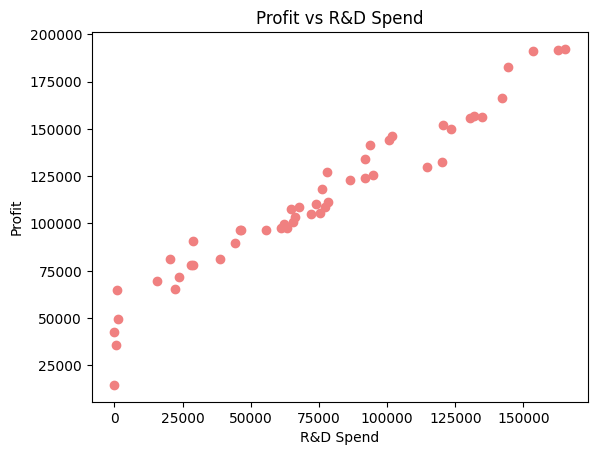

In [ ]:
# Relationship between Profit and R&D Spend
plt.scatter(df['R&D Spend'], df['Profit'], color = 'lightcoral')
plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
# plt.box(False)
plt.show()


In [ ]:
# Split dataset in dependent/independent variables
X = df.iloc[:, :-1].values
# X[:10]#for 2darray representation


In [ ]:
y = df.iloc[:, -1].values
y[:10]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96])

In [ ]:
# One-hot encoding of categorical data
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:]
X
# """
# if we also create a dummy variable "RED", then we have created a redundant variable because if "BLUE" and "GREEN" are both 0,
# then the data point must be red. The model will not be able to distinguish between the effect of "RED" and the effect of the absence of "BLUE" and "GREEN",
#  and the model may become over-parameterized, leading to inaccurate results.

# You don't have to do this because the sci-kit learn library automatically removes one of the variables for you, however,
# if you aren't able to use it for some reason... you can use this code to reconfigure your dataset:
# X = X[:, 1:] # Includes all rows but removes the first dummy variable
# """

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [ ]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predict result
y_pred=regressor.predict(X_test)
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [ ]:
np.set_printoptions(precision=2)
result=np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
result

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

In [ ]:
# Regressor coefficients and intercept
# B0 = index/intercept, x1 = R&D Spend, x2 = Administration, x3 = Marketing Spend, x4 = Florida, x5 = New York
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [-9.59e+02  6.99e+02  7.73e-01  3.29e-02  3.66e-02]
Intercept: 42554.167617767


In [ ]:
# model evolution
# Compare the predicted values with the real values using the R-squared value
# Formula for r-squared => 1 - (sum of residual / sum of mean)
# Sum of residual = mean(sum(y_test - y_pred)^2))
# Sum of mean = mean(sum(y_test - y_mean)^2))

# (Sum of mean > Sum of residual) always if the model is very good

# r2 value => range between 0.8 to 0.98

# r2 value => the more nearer to 1 => the better the model

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score
# R2 score -> 0.93 which is very near to 1 thus showing that the model used is very good model

0.9347068473282987

<ipython-input-39-93508bde1aa5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred - y_test)


Text(0.5, 0, 'errored value')

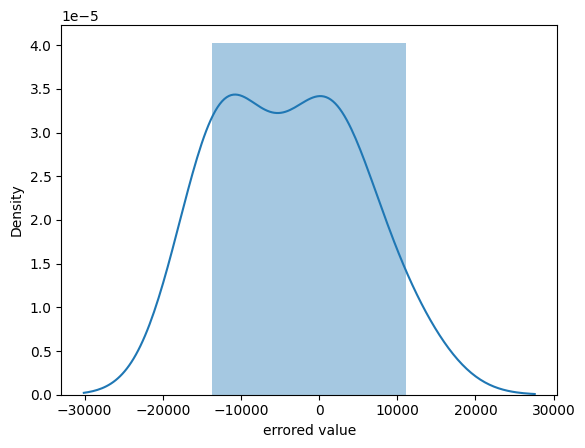

In [ ]:
sns.distplot(y_pred - y_test)
plt.xlabel("errored value")